In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./Portfolio-by-Debt-Size.csv')
df

,Unnamed: 0,Unnamed: 1,Less than 5K,Unnamed: 3,5K to 10K,Unnamed: 5,10K to 20K,Unnamed: 7,20K to 40K,Unnamed: 9,40K to 60K,Unnamed: 11,60K to 80K,Unnamed: 13,80K-100K,Unnamed: 15,100K to 200K,Unnamed: 17,200K+,Unnamed: 19
0,Federal Fiscal Year,NaN,Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions)
1,2017,Q2,$21.2,8.2,$57.3,7.9,$138.0,9.6,$268.0,9.4,$192.6,3.9,$157.1,2.3,$93.9,1.1,$249.1,1.8,$163.2,0.6
2,2017,Q3,$20.8,8.0,$56.7,7.8,$136.5,9.5,$265.0,9.3,$191.9,3.9,$157.6,2.3,$95.3,1.1,$251.1,1.8,$167.2,0.6
3,2017,Q4,$22.4,8.6,$56.9,7.7,$135.8,9.4,$268.3,9.4,$195.1,4.0,$160.3,2.3,$98.2,1.1,$258.9,1.9,$176.0,0.6
4,2018,Q1,$23.1,8.8,$56.5,7.7,$135.3,9.4,$266.5,9.4,$195.2,4.0,$161.2,2.3,$100.1,1.1,$261.7,1.9,$182.0,0.6
5,2018,Q2,$20.7,8.0,$56.5,7.8,$137.4,9.5,$269.4,9.5,$197.6,4.0,$164.9,2.4,$103.4,1.2,$269.5,2.0,$191.6,0.7
6,2018,Q3,$20.4,7.9,$56.0,7.7,$136.0,9.4,$266.4,9.4,$196.9,4.0,$165.3,2.4,$105.2,1.2,$272.7,2.0,$197.6,0.7
7,2018,Q4,$22.1,8.5,$56.3,7.6,$135.1,9.3,$269.8,9.5,$199.8,4.1,$167.5,2.4,$108.2,1.2,$280.4,2.0,$206.4,0.7
8,2019,Q1,$22.6,8.7,$55.9,7.6,$134.6,9.3,$268.1,9.4,$199.7,4.1,$168.1,2.4,$110.2,1.2,$283.1,2.1,$212.7,0.7
9,2019,Q2,$20.2,7.9,$55.7,7.7,$136.2,9.4,$270.0,9.5,$201.4,4.1,$171.2,2.5,$113.5,1.3,$290.4,2.1,$222.3,0.8


In [2]:
years = []
for id, i in enumerate(df['Unnamed: 0']):
    if id == 0: continue
    years.append(i + '-' +df['Unnamed: 1'][id])


In [3]:
amount_lent = {}
borrowers = {}
avg = {}

for i in df.columns:
    if i[0] == 'U': continue
    else:
        amount_lent[i] = []
        borrowers[i] = []
        avg[i] = []

slabs = list(borrowers.keys())

for i in range(1, 28):
    for id, j in enumerate(df.loc[i, :]):
        if id < 2: continue
        else:
            if (id % 2 != 0): borrowers[slabs[(id // 2) - 1]].append(float(j))
            else: amount_lent[slabs[(id - 1) // 2]].append(float(j[1:]))

for i in slabs:
    for id, j in enumerate(amount_lent[i]):
        avg[i].append(amount_lent[i][id] * 1000 / borrowers[i][id])

avg_df = pd.DataFrame(avg, index=years)
amount_lent_df = pd.DataFrame(amount_lent, index=years)
borrowers_df = pd.DataFrame(borrowers, index=years)

In [4]:
borrowers_df.head()

,Less than 5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K-100K,100K to 200K,200K+
2017-Q2,8.2,7.9,9.6,9.4,3.9,2.3,1.1,1.8,0.6
2017-Q3,8.0,7.8,9.5,9.3,3.9,2.3,1.1,1.8,0.6
2017-Q4,8.6,7.7,9.4,9.4,4.0,2.3,1.1,1.9,0.6
2018-Q1,8.8,7.7,9.4,9.4,4.0,2.3,1.1,1.9,0.6
2018-Q2,8.0,7.8,9.5,9.5,4.0,2.4,1.2,2.0,0.7


In [5]:
amount_lent_df.head()

,Less than 5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K-100K,100K to 200K,200K+
2017-Q2,21.2,57.3,138.0,268.0,192.6,157.1,93.9,249.1,163.2
2017-Q3,20.8,56.7,136.5,265.0,191.9,157.6,95.3,251.1,167.2
2017-Q4,22.4,56.9,135.8,268.3,195.1,160.3,98.2,258.9,176.0
2018-Q1,23.1,56.5,135.3,266.5,195.2,161.2,100.1,261.7,182.0
2018-Q2,20.7,56.5,137.4,269.4,197.6,164.9,103.4,269.5,191.6


In [6]:
avg_df.head()

,Less than 5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K-100K,100K to 200K,200K+
2017-Q2,2585.365854,7253.164557,14375.000000,28510.638298,49384.615385,68304.347826,85363.636364,138388.888889,272000.000000
2017-Q3,2600.000000,7269.230769,14368.421053,28494.623656,49205.128205,68521.739130,86636.363636,139500.000000,278666.666667
2017-Q4,2604.651163,7389.610390,14446.808511,28542.553191,48775.000000,69695.652174,89272.727273,136263.157895,293333.333333
2018-Q1,2625.000000,7337.662338,14393.617021,28351.063830,48800.000000,70086.956522,91000.000000,137736.842105,303333.333333
2018-Q2,2587.500000,7243.589744,14463.157895,28357.894737,49400.000000,68708.333333,86166.666667,134750.000000,273714.285714


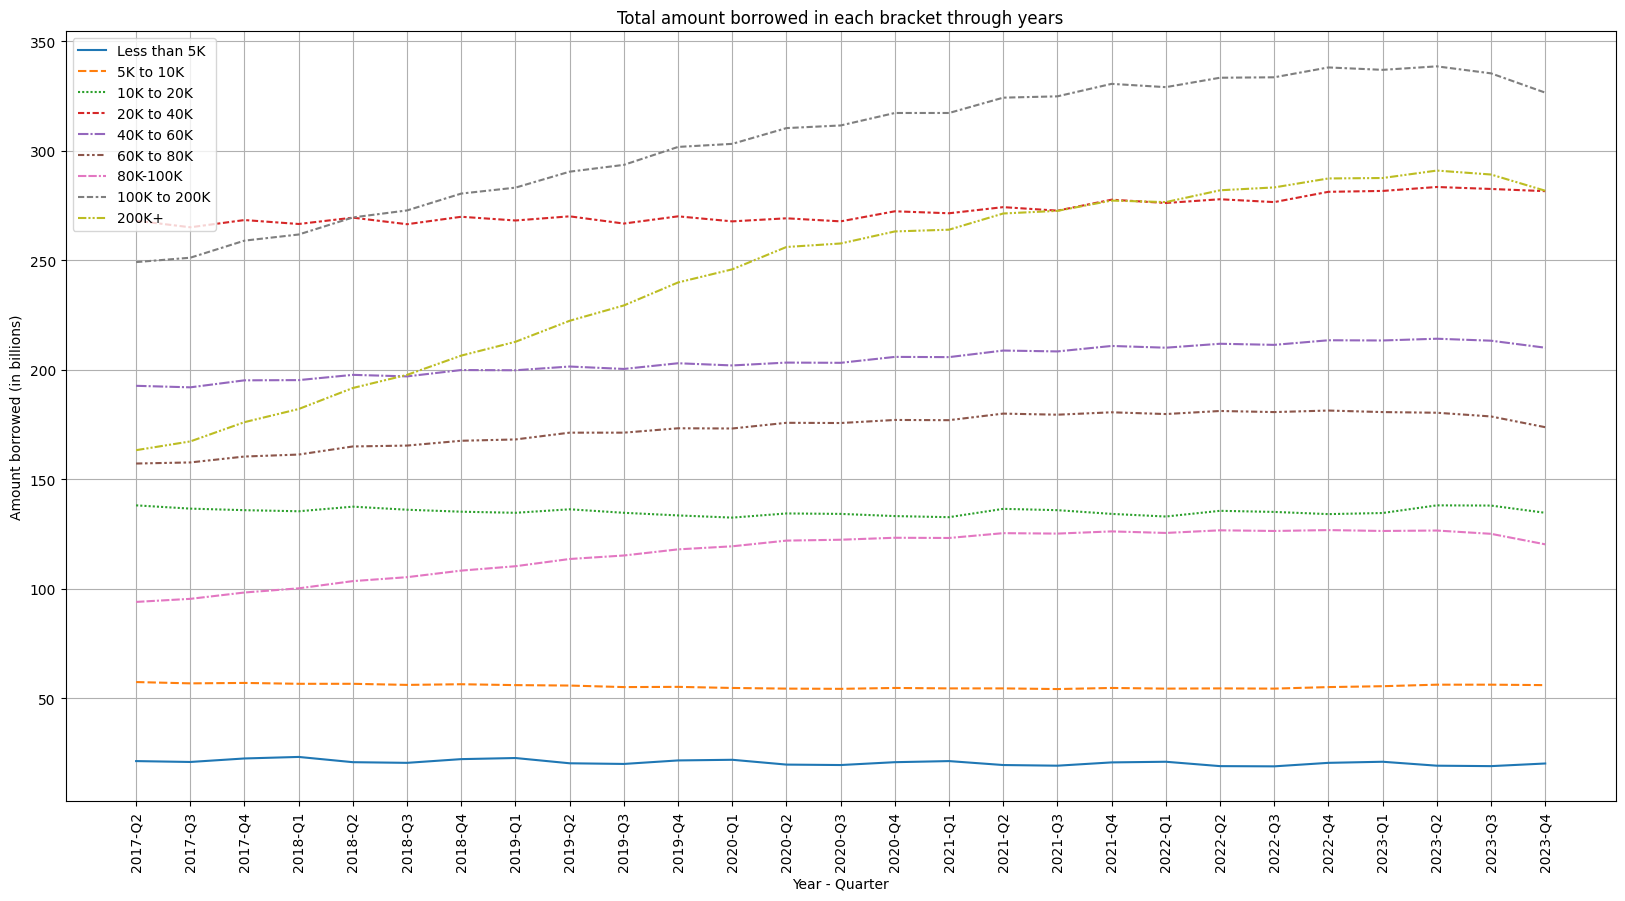

In [7]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=amount_lent_df)
plt.title("Total amount borrowed in each bracket through years")
plt.xlabel("Year - Quarter")
plt.ylabel("Amount borrowed (in billions)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

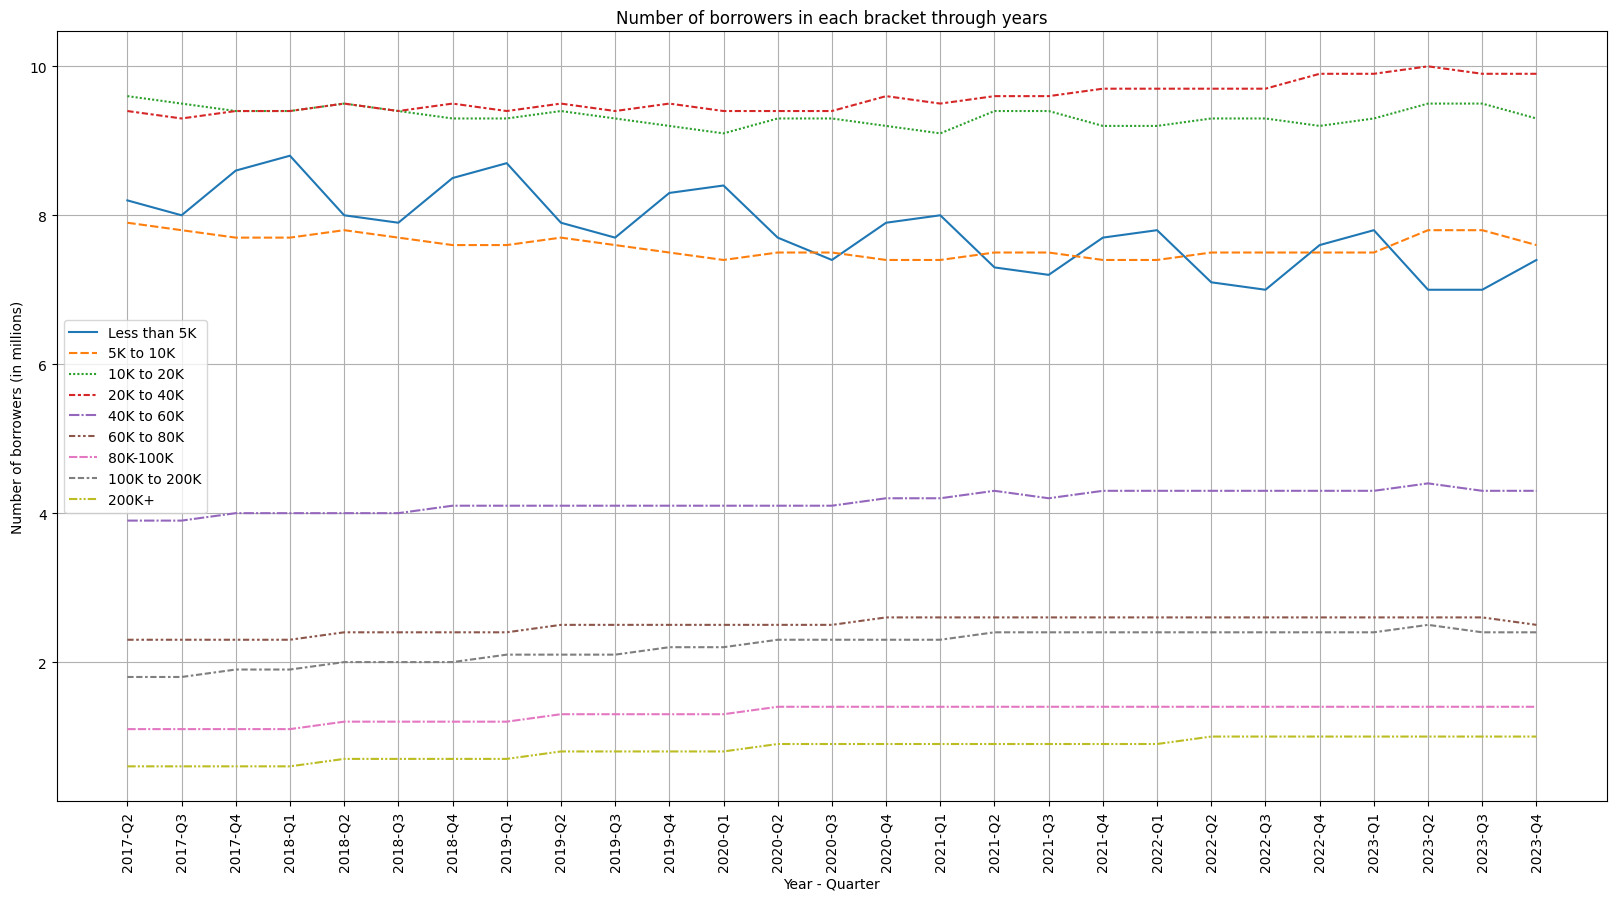

In [8]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=borrowers_df)
plt.title("Number of borrowers in each bracket through years")
plt.xlabel("Year - Quarter")
plt.ylabel("Number of borrowers (in millions)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

<Axes: xlabel='Year - Quarter', ylabel='Average amount borrowed in a bracket (log scale)'>

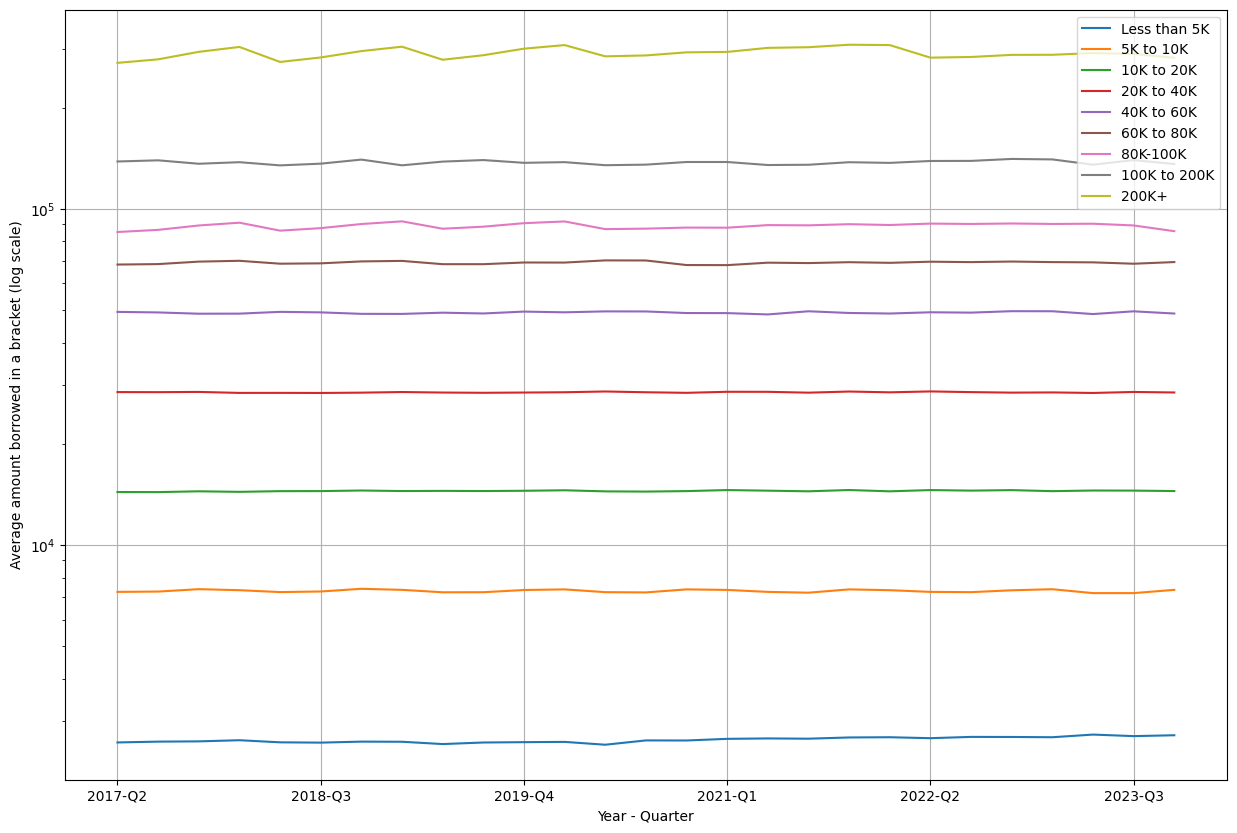

In [9]:
avg_df.plot(kind='line', figsize=(15, 10), xlabel="Year - Quarter", ylabel="Average amount borrowed in a bracket (log scale)", logy=True, grid=True)

* We could plot intensity graph for the number of borrowers, but it would be too if we want to do this for every, instead we should add up the quarters for this and plot only years. Since, above shown line graph summarises all the values.
* We could how each quarter behaves within an year and across years.
* Average amount borrowed in a particular slab seemed an alright idea but same inferences could be derived from other two plots (only top-most bracket has the average value fluctuating thoughout the time).

<Axes: >

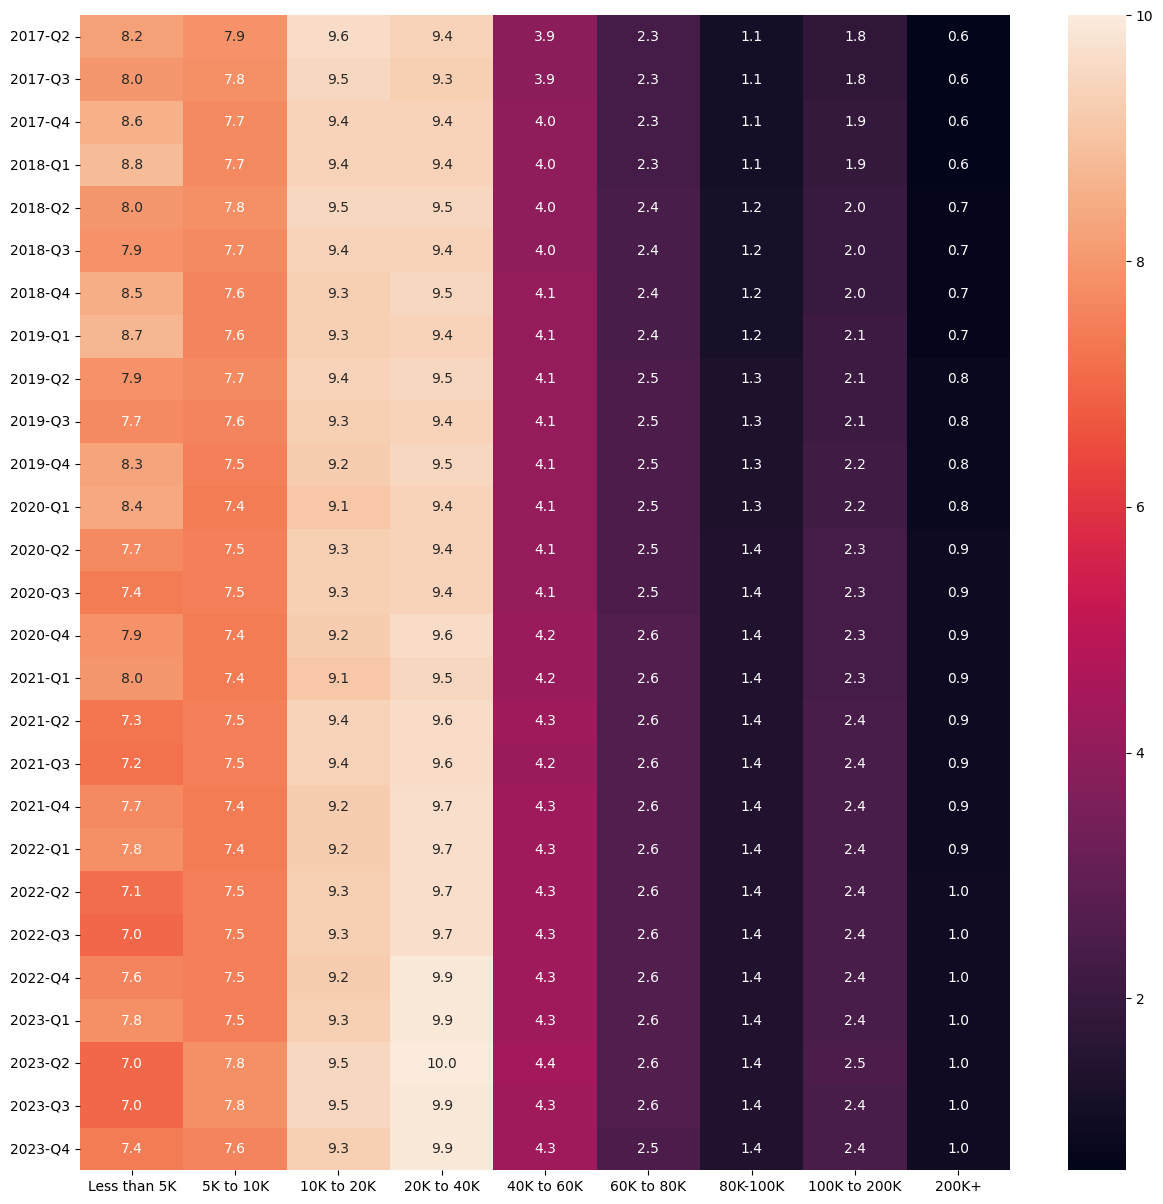

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(borrowers_df, annot=True, fmt='.1f')

<Axes: >

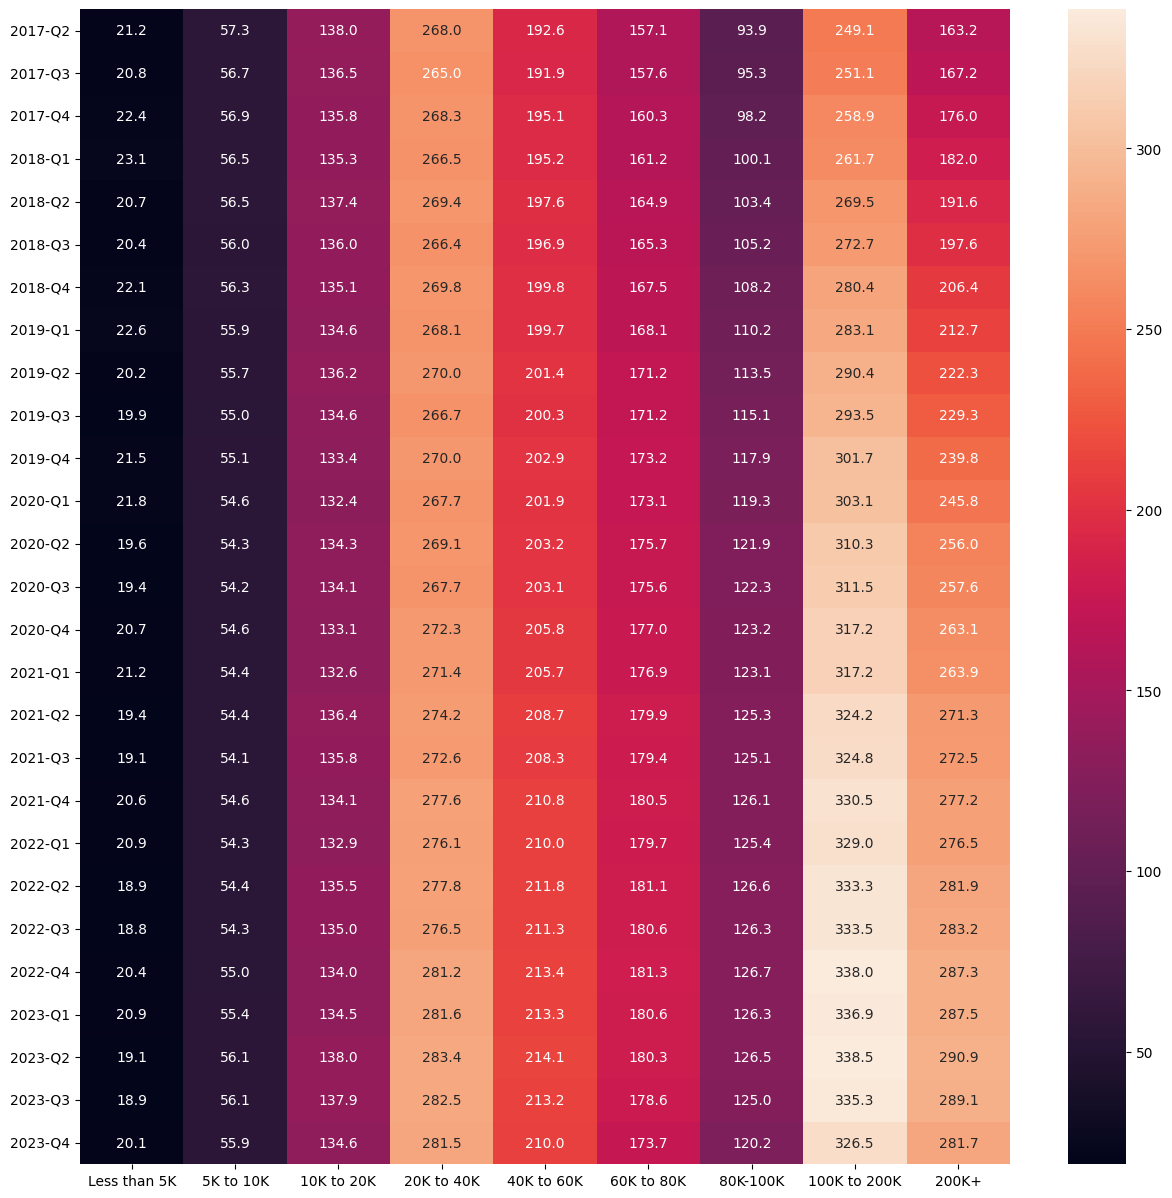

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(amount_lent_df, annot=True, fmt='.1f')

<Axes: >

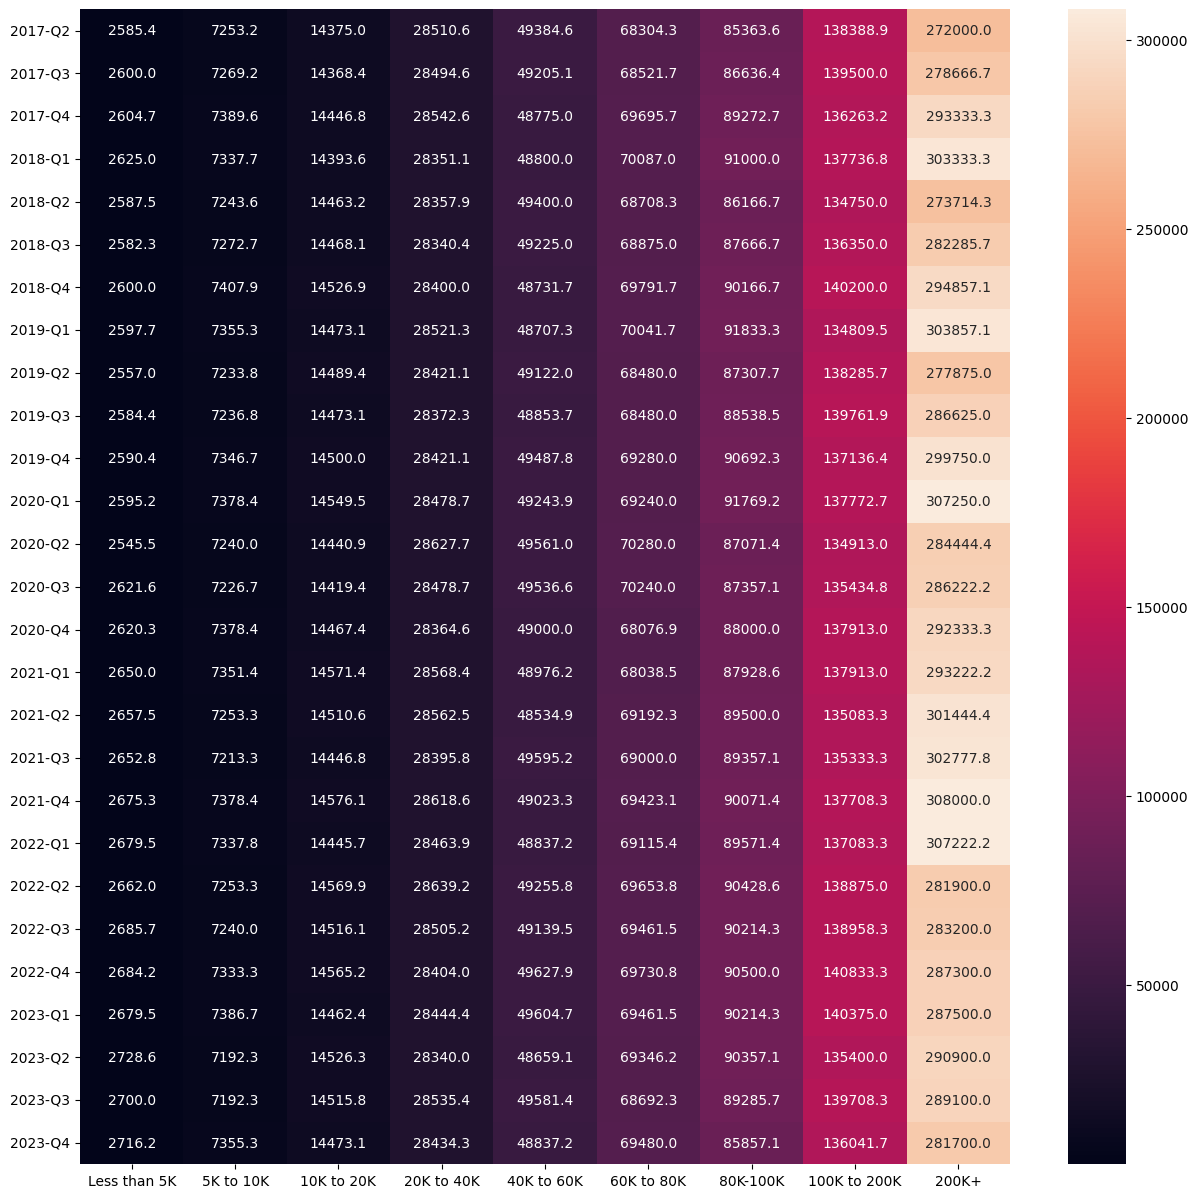

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(avg_df, annot=True, fmt='.1f')

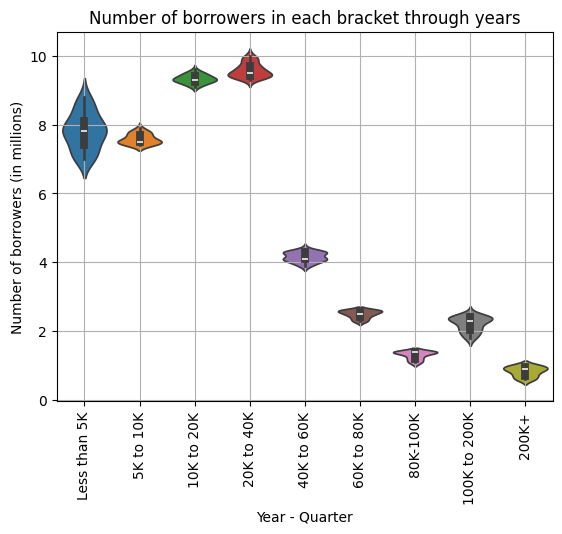

In [13]:
sns.violinplot(borrowers_df)
plt.title("Number of borrowers in each bracket through years")
plt.xlabel("Year - Quarter")
plt.ylabel("Number of borrowers (in millions)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

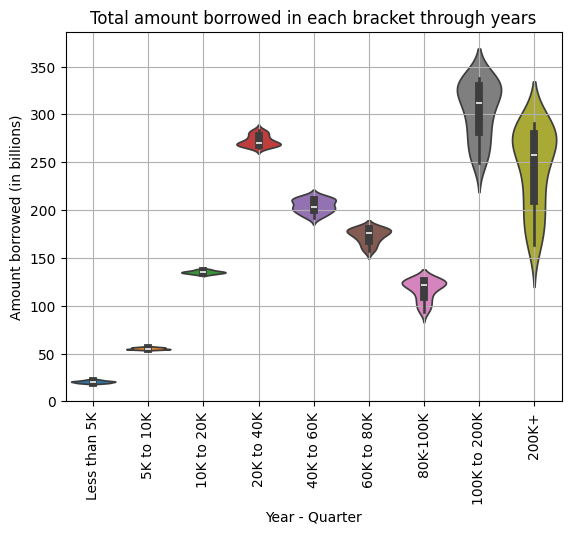

In [14]:
sns.violinplot(amount_lent_df)
plt.title("Total amount borrowed in each bracket through years")
plt.xlabel("Year - Quarter")
plt.ylabel("Amount borrowed (in billions)")
plt.xticks(rotation=90)
plt.grid()
plt.show()